In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import time
import pickle as pk
from edo_fdm_model import fdm
import matplotlib.pyplot as plt

# Turn interactive plotting off
plt.ioff()

In [2]:
def parseParameters(name):
    var_dict = {}

    param_tuple = name.split("__")

    for tuple in param_tuple:
        name, value = tuple.split("--")

        var_dict[name] = float(value)

    return var_dict


def generateCommand(struct_name, save="False", plot="False"):
    params_str = struct_name.split("__")

    for i in range(len(params_str)):
        params_str[i] = params_str[i].replace("--", " ")
        params_str[i] = "--" + params_str[i]

    return " ".join(params_str) + " -s " + save + " -pt " + plot

In [3]:
k = 0.001
t_lower = 0.0
t_upper = 10
phi = 0.2
ksi = 0.0
cb = 0.15
C_nmax = 0.55
mi_n = 0.2
lambd_bn = 0.1
y_n = 0.1

size_t = int(((t_upper - t_lower) / (k)))

lmb_var = 0.1

lmb_list = np.linspace(
    1.8 * (1 - lmb_var), 1.8 * (1 + lmb_var), num=size_t + 1, endpoint=True
)

print(
    "Steps in time = {:d}\n".format(
        size_t,
    )
)

t_np = np.linspace(t_lower, t_upper, num=size_t + 1, endpoint=True)

for i, lbm_nb in enumerate(lmb_list):

    struct_name = (
        "k--"
        + str(k)
        + "__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--"
        + str(lbm_nb)
        + "__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--"
        + str(t_lower)
        + "__t_upper--"
        + str(t_upper)
    )

    if i == 0:
        Cp_old, Cl_old = fdm(
            k,
            phi,
            ksi,
            cb,
            C_nmax,
            lbm_nb,
            mi_n,
            lambd_bn,
            y_n,
            t_lower,
            t_upper,
            plot=True,
        )

    else:
        Cp_new, Cl_new = fdm(
            k,
            phi,
            ksi,
            cb,
            C_nmax,
            lbm_nb,
            mi_n,
            lambd_bn,
            y_n,
            t_lower,
            t_upper,
            plot=True,
        )

        Cp_old = np.vstack((Cp_old.copy(), Cp_new))
        Cl_old = np.vstack((Cl_old.copy(), Cl_new))

    print(i + 1, "de", len(lmb_list))

Steps in time = 10000



1 de 10001
2 de 10001
3 de 10001
4 de 10001
5 de 10001
6 de 10001
7 de 10001
8 de 10001
9 de 10001
10 de 10001
11 de 10001
12 de 10001
13 de 10001
14 de 10001
15 de 10001
16 de 10001
17 de 10001
18 de 10001
19 de 10001
20 de 10001


/home/thiago/Documentos/gitHub/2D_imune_edema_pinn/edo_fago/edo_fdm_model.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=[18, 9])


21 de 10001
22 de 10001
23 de 10001
24 de 10001
25 de 10001
26 de 10001
27 de 10001
28 de 10001
29 de 10001
30 de 10001
31 de 10001
32 de 10001
33 de 10001
34 de 10001
35 de 10001
36 de 10001
37 de 10001
38 de 10001
39 de 10001
40 de 10001
41 de 10001
42 de 10001
43 de 10001
44 de 10001
45 de 10001
46 de 10001
47 de 10001
48 de 10001
49 de 10001
50 de 10001
51 de 10001
52 de 10001
53 de 10001
54 de 10001
55 de 10001
56 de 10001
57 de 10001
58 de 10001
59 de 10001
60 de 10001
61 de 10001
62 de 10001
63 de 10001
64 de 10001
65 de 10001
66 de 10001
67 de 10001
68 de 10001
69 de 10001
70 de 10001
71 de 10001
72 de 10001
73 de 10001
74 de 10001
75 de 10001
76 de 10001
77 de 10001
78 de 10001
79 de 10001
80 de 10001
81 de 10001
82 de 10001
83 de 10001
84 de 10001
85 de 10001
86 de 10001
87 de 10001
88 de 10001
89 de 10001
90 de 10001
91 de 10001
92 de 10001
93 de 10001
94 de 10001
95 de 10001
96 de 10001
97 de 10001
98 de 10001
99 de 10001
100 de 10001
101 de 10001
102 de 10001
103 de 10001


In [ ]:
tt, ll = np.meshgrid(t_np, lmb_list)

data_input_np = np.array([Cp_old.flatten(), Cp_old.flatten()]).T

if torch.cuda.is_available():
    device = torch.device("cuda")
    t = (
        torch.tensor(tt, dtype=torch.float32, requires_grad=True)
        .reshape(-1, 1)
        .to(device)
    )
    lambd_nb = (
        torch.tensor(ll, dtype=torch.float32, requires_grad=True)
        .reshape(-1, 1)
        .to(device)
    )
    data_input = torch.tensor(data_input_np, dtype=torch.float32).to(device)

else:
    device = torch.device("cpu")
    t = torch.tensor(tt, dtype=torch.float32, requires_grad=True).reshape(-1, 1)
    lambd_nb = torch.tensor(ll, dtype=torch.float32, requires_grad=True).reshape(-1, 1)
    data_input = torch.tensor(data_input_np, dtype=torch.float32)

print(device)

cpu


In [ ]:
activation_dict = {
    "Elu": nn.ELU,
    "LeakyReLU": nn.LeakyReLU,
    "Sigmoid": nn.Sigmoid,
    "Softplus": nn.Softplus,
    "Tanh": nn.Tanh,
    "Linear": nn.Linear,
    "ReLU": nn.ReLU,
    "RReLU": nn.RReLU,
    "SELU": nn.SELU,
    "CELU": nn.CELU,
    "GELU": nn.GELU,
    "SiLU": nn.SiLU,
    "GLU": nn.GLU,
}

In [ ]:
arch_str = "Tanh--32__Tanh--32__Tanh--32__GELU--32"

In [ ]:
def generate_model(arch_str):

    hidden_layers = arch_str.split("__")

    modules = []

    for params in hidden_layers:

        if len(params) != 0:
            activation, out_neurons = params.split("--")

            if len(modules) == 0:
                if activation == "Linear":
                    modules.append(activation_dict[activation](2, int(out_neurons)))

                else:
                    modules.append(nn.Linear(2, int(out_neurons)))
                    modules.append(activation_dict[activation]())

            else:
                if activation == "Linear":
                    modules.append(
                        activation_dict[activation](int(in_neurons), int(out_neurons))
                    )

                else:
                    modules.append(nn.Linear(int(in_neurons), int(out_neurons)))
                    modules.append(activation_dict[activation]())

            in_neurons = out_neurons

    modules.append(nn.Linear(int(in_neurons), 2))

    return nn.Sequential(*modules)

In [ ]:
model = generate_model(arch_str).to(device)

print(model)

Sequential(
  (0): Linear(in_features=2, out_features=32, bias=True)
  (1): Tanh()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): Tanh()
  (4): Linear(in_features=32, out_features=32, bias=True)
  (5): Tanh()
  (6): Linear(in_features=32, out_features=32, bias=True)
  (7): GELU(approximate=none)
  (8): Linear(in_features=32, out_features=2, bias=True)
)


In [ ]:
def initial_condition(t):
    Cl = torch.zeros_like(t)
    Cp = torch.zeros_like(t) + 0.2
    return torch.cat([Cl, Cp], dim=1)

In [ ]:
def pde(t, lambd_nb, model):

    mesh = torch.cat([t, lambd_nb], dim=1)

    Cl, Cp = model(mesh).split(1, dim=1)

    # Calculando Cp

    dCp_dt = torch.autograd.grad(
        Cp,
        t,
        grad_outputs=torch.ones_like(Cp),
        create_graph=True,
        retain_graph=True,
    )[0]

    Cp_eq = (cb - lambd_nb * Cl) * Cp * phi - dCp_dt

    # Calculando Cl

    dCl_dt = torch.autograd.grad(
        Cl,
        t,
        grad_outputs=torch.ones_like(Cl),
        create_graph=True,
        retain_graph=True,
    )[0]

    Cl_eq = (y_n * Cp * (C_nmax - 1) - (lambd_bn * Cp + mi_n)) * Cl * phi - dCl_dt

    del dCl_dt
    del dCp_dt

    torch.cuda.empty_cache()

    return torch.cat([Cl_eq, Cp_eq], dim=1)

In [ ]:
loss_fn = nn.MSELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
decay_rate = 0.99

lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decay_rate)

n_epochs = 1000
batch_size = 100
C_pde_loss_it = torch.zeros(n_epochs).to(device)
C_data_loss_it = torch.zeros(n_epochs).to(device)
C_initial_loss_it = torch.zeros(n_epochs).to(device)
C_initial = initial_condition(t).to(device)

for epoch in range(n_epochs):
    for i in range(0, len(t), batch_size):

        t_initial = torch.zeros_like(t[i : i + batch_size])

        mesh = torch.cat([t_initial, lambd_nb[i : i + batch_size]], dim=1)
        C_initial_pred = model(mesh)

        loss_initial = loss_fn(C_initial[i : i + batch_size], C_initial_pred)

        mesh = torch.cat([t[i : i + batch_size], lambd_nb[i : i + batch_size]], dim=1)
        C_pred = model(mesh)

        loss_pde = loss_fn(
            pde(t[i : i + batch_size], lambd_nb[i : i + batch_size], model),
            torch.cat([t_initial, t_initial], dim=1),
        )

        loss_data = loss_fn(C_pred, data_input[i : i + batch_size])

        loss = loss_initial + loss_pde + loss_data
        # loss = loss_initial + loss_data

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # lr_scheduler.step()

    C_pde_loss_it[epoch] = loss_pde.item()
    C_initial_loss_it[epoch] = loss_initial.item()
    C_data_loss_it[epoch] = loss_data.item()

    if epoch % 100 == 0:
        print(f"Finished epoch {epoch}, latest loss {loss}")

Finished epoch 0, latest loss 0.49517858028411865


Finished epoch 100, latest loss 0.04221922159194946
Finished epoch 200, latest loss 0.04155933856964111
Finished epoch 300, latest loss 0.04112592339515686
Finished epoch 400, latest loss 0.040794238448143005


In [ ]:
pinn_file = "epochs_{}__batch_{}__arch_".format(n_epochs, batch_size) + arch_str

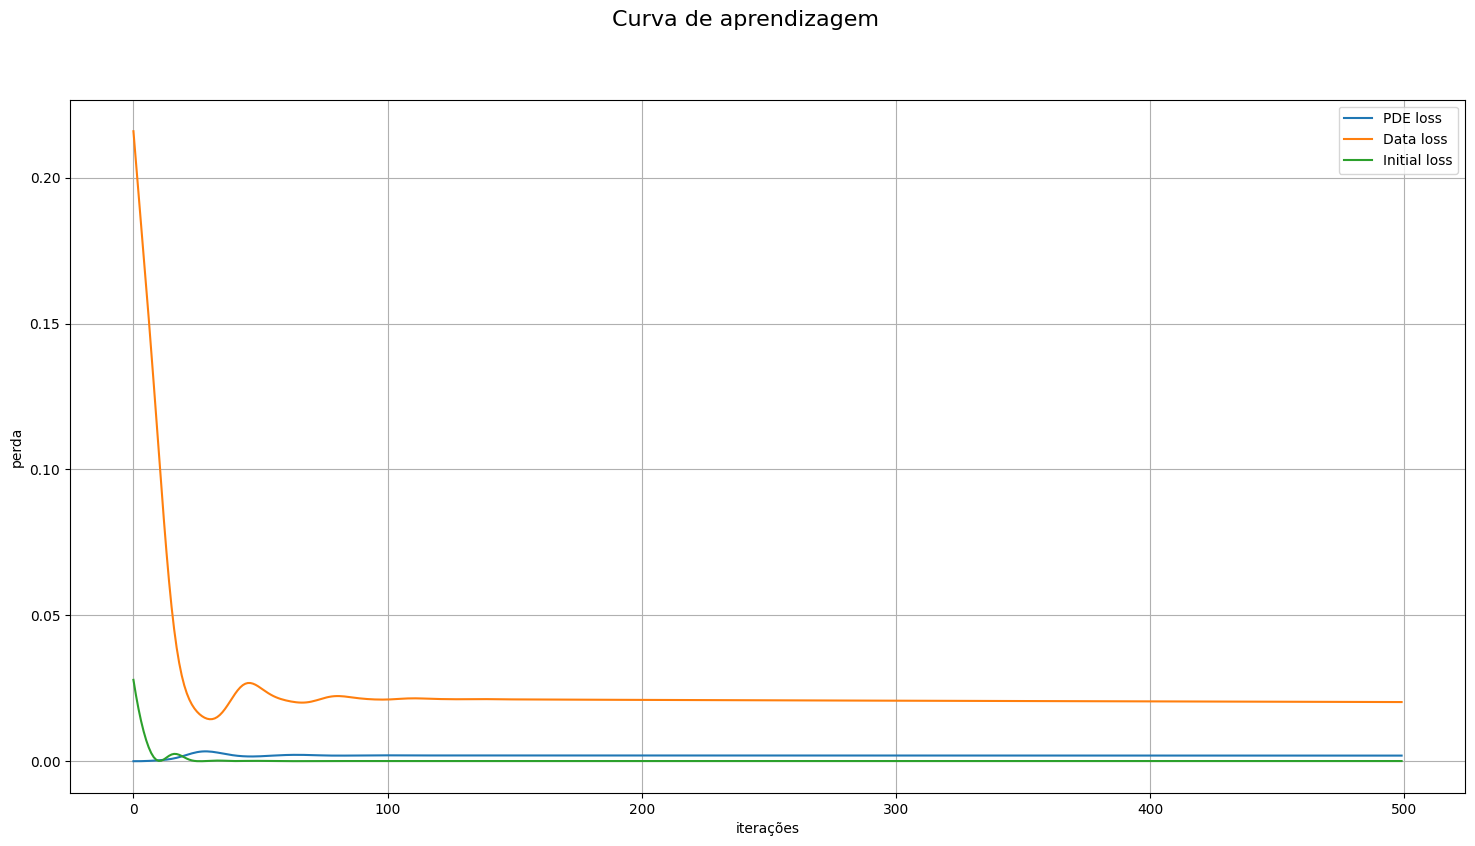

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Curva de aprendizagem", fontsize=16)

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel("iterações")
ax.set_ylabel("perda")
ax.plot(
    range(len(C_pde_loss_it.cpu().numpy())),
    C_pde_loss_it.cpu().numpy(),
    label="PDE loss",
)
ax.plot(
    range(len(C_data_loss_it.cpu().numpy())),
    C_data_loss_it.cpu().numpy(),
    label="Data loss",
)
ax.plot(
    range(len(C_initial_loss_it.cpu().numpy())),
    C_initial_loss_it.cpu().numpy(),
    label="Initial loss",
)
# ax.set_yscale("log")
ax.grid()
ax.legend()

plt.savefig("learning_curves/" + pinn_file + ".png")
plt.show()

In [ ]:
model_cpu = model.to("cpu")

speed_up = []

mesh = torch.cat([t, lambd_nb], dim=1)

for i in range(10):

    fdm_start = time.time()

    for lbm_nb in lmb_list:

        struct_name = (
            "k--"
            + str(k)
            + "__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--"
            + str(lbm_nb)
            + "__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--"
            + str(t_lower)
            + "__t_upper--"
            + str(t_upper)
        )

        _, _ = fdm(
            k,
            phi,
            ksi,
            cb,
            C_nmax,
            lbm_nb,
            mi_n,
            lambd_bn,
            y_n,
            t_lower,
            t_upper,
        )

    fdm_end = time.time()

    pinn_start = time.time()

    with torch.no_grad():
        Cl_pinn, Cp_pinn = model_cpu(mesh).split(1, dim=1)

    pinn_end = time.time()

    fdm_time = fdm_end - fdm_start

    pinn_time = pinn_end - pinn_start

    speed_up.append(fdm_time / pinn_time)

In [ ]:
mean_speed_up = np.mean(speed_up)
std_speed_up = np.std(speed_up)

rmse = np.mean(
    [
        ((Cl_p[0] - Cl_f) ** 2 + (Cp_p[0] - Cp_f) ** 2) ** 0.5
        for Cl_p, Cp_p, Cl_f, Cp_f in zip(
            Cl_pinn, Cp_pinn, Cl_old.flatten(), Cp_old.flatten()
        )
    ]
)

max_ae = np.max(
    [
        [((Cl_p[0] - Cl_f) ** 2) ** 0.5, ((Cp_p[0] - Cp_f) ** 2) ** 0.5]
        for Cl_p, Cp_p, Cl_f, Cp_f in zip(
            Cl_pinn, Cp_pinn, Cl_old.flatten(), Cp_old.flatten()
        )
    ]
)

In [ ]:
output = {
    "rmse": rmse,
    "max_ae": max_ae,
    "mean_speed_up": mean_speed_up,
    "std_speed_up": std_speed_up,
    "Cl_pinn": Cl_pinn,
    "Cp_pinn": Cp_pinn,
}

In [ ]:
print("Erro absoluto médio", rmse)
print("Erro absoluto máximo", max_ae)
print("Speed Up: {} +/-{}".format(mean_speed_up, std_speed_up))

Erro absoluto médio 0.1992662
Erro absoluto máximo 0.258351
Speed Up: 0.4581803103683604 +/-0.4202642528642985


In [ ]:
with open("edo_pinn_sim/" + pinn_file + ".pkl", "wb") as f:
    pk.dump(output, f)

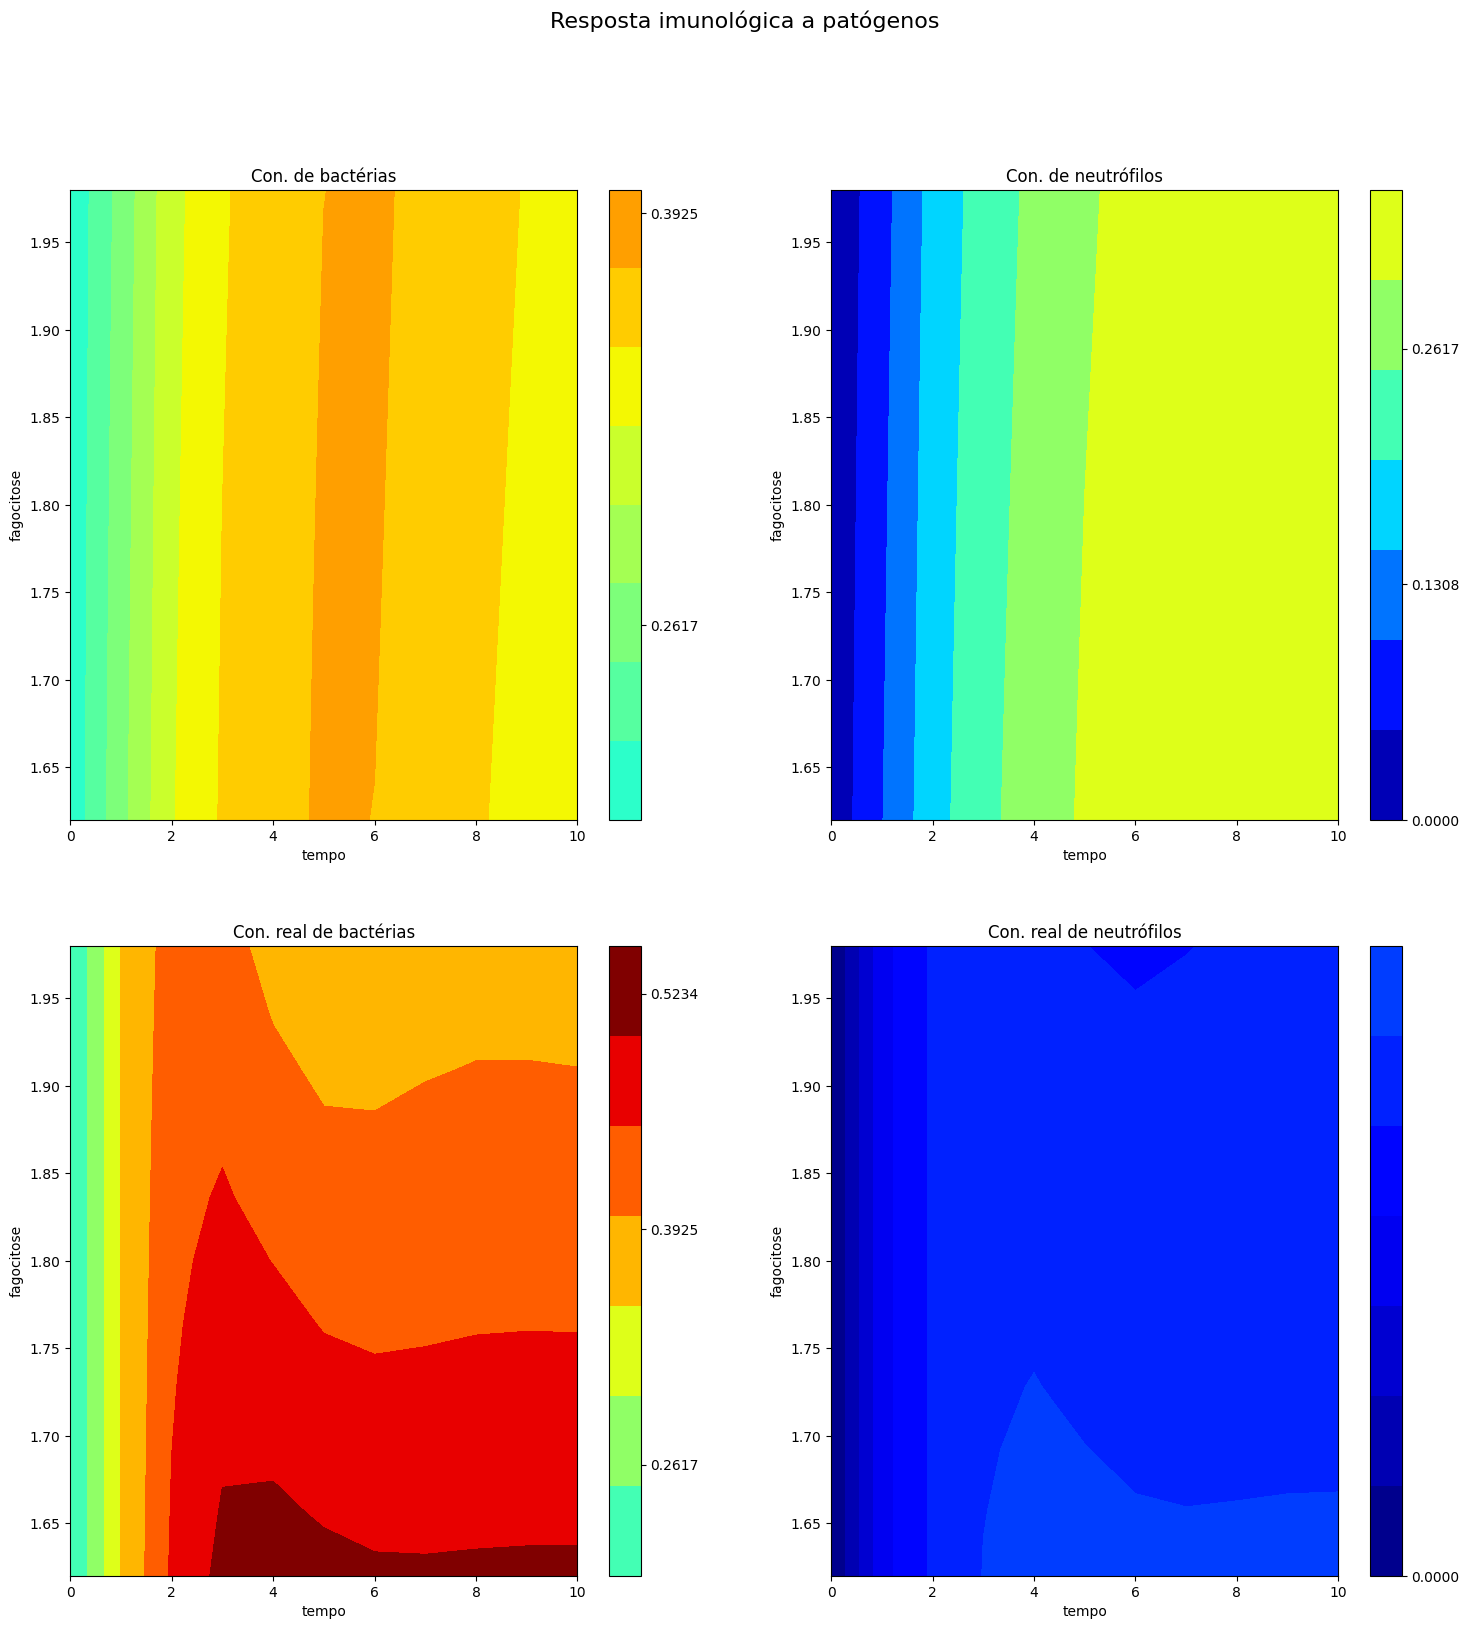

In [ ]:
Cl_pinn_np = Cl_pinn.detach().numpy().reshape(size_t + 1, size_t + 1)
Cp_pinn_np = Cp_pinn.detach().numpy().reshape(size_t + 1, size_t + 1)

fig = plt.figure(figsize=[18, 18])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)

vmin = 0
vmax = np.max(
    [
        np.max(Cp_pinn.cpu().numpy()),
        np.max(Cl_pinn.cpu().numpy()),
        np.max(Cp_old),
        np.max(Cl_old),
    ]
)

# Plotango 3D
ax = fig.add_subplot(2, 2, 1)

contour = ax.contourf(
    tt,
    ll,
    Cp_pinn_np,
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. de bactérias")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")
colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

# Plotando 2D

ax = fig.add_subplot(2, 2, 2)

contour = ax.contourf(
    tt,
    ll,
    Cl_pinn_np,
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. de neutrófilos")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")

colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

# Plotango 3D
ax = fig.add_subplot(2, 2, 3)

contour = ax.contourf(
    tt,
    ll,
    Cp_old.reshape(size_t + 1, size_t + 1),
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. real de bactérias")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")
colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

# Plotando 2D

ax = fig.add_subplot(2, 2, 4)

contour = ax.contourf(
    tt,
    ll,
    Cl_old.reshape(size_t + 1, size_t + 1),
    cmap="jet",
    vmin=vmin,
    vmax=vmax,
)
ax.set_title("Con. real de neutrófilos")
ax.set_xlabel("tempo")
ax.set_ylabel("fagocitose")

colobar = fig.colorbar(contour, ticks=np.linspace(vmin, vmax, num=5))

plt.show()

In [ ]:
lambd_nb[10 * (size_t + 1)].detach().numpy()[0]

1.98

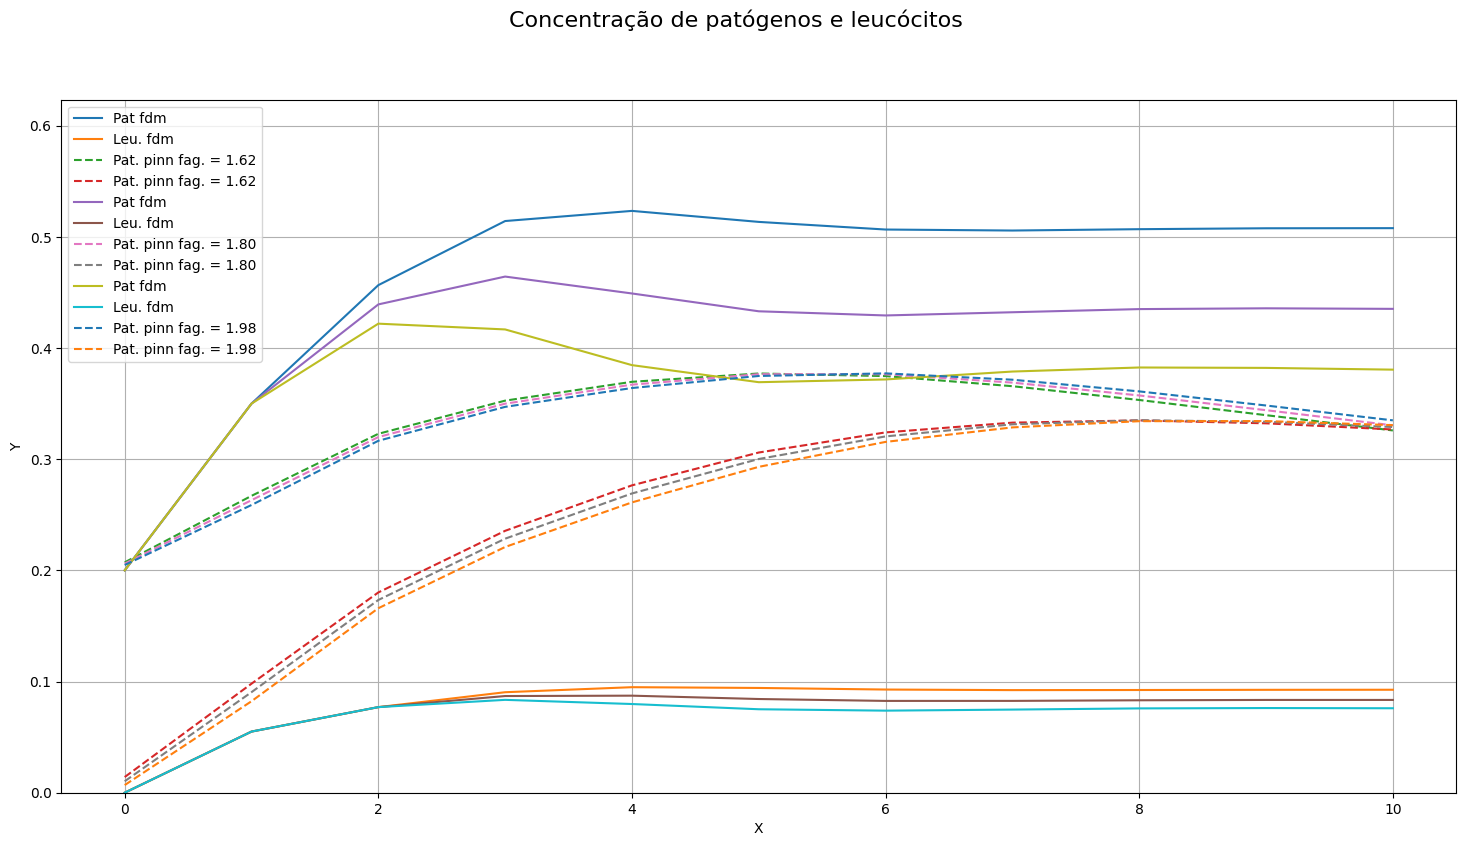

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Concentração de patógenos e leucócitos", fontsize=16)


vmin = 0
vmax = np.max(
    [
        np.max(Cp_pinn.cpu().numpy()),
        np.max(Cl_pinn.cpu().numpy()),
        np.max(Cp_old),
        np.max(Cl_old),
    ]
)

cp_real_1 = Cp_old[0, :]
cl_real_1 = Cl_old[0, :]
cp_pinn_1 = Cp_pinn_np[0, :]
cl_pinn_1 = Cl_pinn_np[0, :]
fag_1 = lambd_nb[0 * (size_t + 1)].detach().numpy()[0]

cp_real_2 = Cp_old[5, :]
cl_real_2 = Cl_old[5, :]
cp_pinn_2 = Cp_pinn_np[5, :]
cl_pinn_2 = Cl_pinn_np[5, :]
fag_2 = lambd_nb[5 * (size_t + 1)].detach().numpy()[0]

cp_real_3 = Cp_old[10, :]
cl_real_3 = Cl_old[10, :]
cp_pinn_3 = Cp_pinn_np[10, :]
cl_pinn_3 = Cl_pinn_np[10, :]
fag_3 = lambd_nb[10 * (size_t + 1)].detach().numpy()[0]

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(t_np, cp_real_1, label="Pat fdm")
ax.plot(t_np, cl_real_1, label="Leu. fdm")
ax.plot(t_np, cp_pinn_1, "--", label="Pat. pinn fag. = {:.2f}".format(fag_1))
ax.plot(t_np, cl_pinn_1, "--", label="Pat. pinn fag. = {:.2f}".format(fag_1))

ax.plot(t_np, cp_real_2, label="Pat fdm")
ax.plot(t_np, cl_real_2, label="Leu. fdm")
ax.plot(t_np, cp_pinn_2, "--", label="Pat. pinn fag. = {:.2f}".format(fag_2))
ax.plot(t_np, cl_pinn_2, "--", label="Pat. pinn fag. = {:.2f}".format(fag_2))

ax.plot(t_np, cp_real_3, label="Pat fdm")
ax.plot(t_np, cl_real_3, label="Leu. fdm")
ax.plot(t_np, cp_pinn_3, "--", label="Pat. pinn fag. = {:.2f}".format(fag_3))
ax.plot(t_np, cl_pinn_3, "--", label="Pat. pinn fag. = {:.2f}".format(fag_3))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()